In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycoingecko import CoinGeckoAPI
import time
import math

In [2]:

df = pd.read_csv("all_crypto_data.csv")

id symbol                name  \
0                 bitcoin    btc             Bitcoin   
1                ethereum    eth            Ethereum   
2                  tether   usdt              Tether   
3             binancecoin    bnb                 BNB   
4                  ripple    xrp                 XRP   
...                   ...    ...                 ...   
10145        cola-token-2   cola          Cola Token   
10146               fiero  fiero               Fiero   
10147         amplifi-dao    agg         AmpliFi DAO   
10148                ayin   ayin                Ayin   
10149  collateral-network   colt  Collateral Network   

                                                   image  current_price  \
0      https://assets.coingecko.com/coins/images/1/la...       24364.00   
1      https://assets.coingecko.com/coins/images/279/...        1546.27   
2      https://assets.coingecko.com/coins/images/325/...           0.92   
3      https://assets.coingecko.com/coins/images/825/...         199.99   
4      https://assets.coingecko.com/coins/images/44/l...           0.49   
...                                                  ...            ...   
10145  https://assets.coingecko.com/coins/images/3093...            NaN   
10146  https://assets.coingecko.com/coins/images/3036...            NaN   
10147  https://assets.coingecko.com/coins/images/2913...            NaN   
10148  https://assets.coingecko.com/coins/images/3131...            NaN   
10149  https://assets.coingecko.com/coins/images/2977...            NaN   

           market_cap  market_cap_rank  fully_diluted_valuation  \
0     474520923430.00             1.00          511916601833.00   
1     185987617154.00             2.00          185987617154.00   
2      76220647448.00             3.00           76220647448.00   
3      30778531852.00             4.00           40009491790.00   
4      25770400977.00             5.00           48702246501.00   
...               ...              ...                      ...   
10145             NaN              NaN                      NaN   
10146             NaN              NaN                      NaN   
10147             NaN              NaN                      NaN   
10148             NaN              NaN                      NaN   
10149             NaN              NaN                      NaN   

        total_volume  high_24h  ...   total_supply      max_supply      ath  \
0     16246140503.00  24433.00  ...    21000000.00     21000000.00 59717.00   
1     11872679879.00   1553.38  ...   120214313.22             NaN  4228.93   
2     14146803743.00      0.93  ... 82845776808.29             NaN     1.13   
3       661259225.00    200.63  ...   153856150.00    200000000.00   583.17   
4       933292698.00      0.49  ... 99988485729.00 100000000000.00     2.82   
...              ...       ...  ...            ...             ...      ...   
10145            NaN       NaN  ...            NaN             NaN      NaN   
10146            NaN       NaN  ...            NaN             NaN      NaN   
10147            NaN       NaN  ...  3000000000.00             NaN      NaN   
10148            NaN       NaN  ...      192459.00      4000000.00      NaN   
10149            NaN       NaN  ...  1400000000.00   1400000000.00      NaN   

       ath_change_percentage                  ath_date   atl  \
0                     -59.18  2021-11-10T14:24:11.849Z 51.30   
1                     -63.42  2021-12-01T08:38:24.623Z  0.38   
2                     -18.70  2018-07-24T00:00:00.000Z  0.53   
3                     -65.70  2021-11-26T02:58:28.000Z  0.03   
4                     -82.75  2018-01-07T00:00:00.000Z  0.00   
...                      ...                       ...   ...   
10145                   0.00                       NaN   NaN   
10146                   0.00                       NaN   NaN   
10147                   0.00                       NaN   NaN   
10148                   0.00                       NaN 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10150 entries, 0 to 10149
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                10150 non-null  object 
 1   symbol                            10150 non-null  object 
 2   name                              10150 non-null  object 
 3   image                             10150 non-null  object 
 4   current_price                     9747 non-null   float64
 5   market_cap                        9692 non-null   float64
 6   market_cap_rank                   3649 non-null   float64
 7   fully_diluted_valuation           8791 non-null   float64
 8   total_volume                      9629 non-null   float64
 9   high_24h                          7109 non-null   float64
 10  low_24h                           7109 non-null   float64
 11  price_change_24h                  7109 non-null   float64
 12  pric


El resultado de la función df.info() proporciona información importante sobre el DataFrame y sus columnas. Entendemos que:

Tenemos 10,150 entradas/monedas (de 0 a 10149).
La mayoría de las columnas tienen valores faltantes, como se indica por la diferencia entre el recuento de 'RangeIndex' (10150) y el recuento de 'Non-Null Count'. Por ejemplo, el recuento de valores no nulos para la columna 'current_price' es 9747, lo que significa que hay 403 valores faltantes para esta columna (10150 - 9747).
La columna roi tiene un recuento relativamente bajo de valores no nulos (383 de 10,150), lo que indica que contiene una cantidad significativa de datos faltantes.

## Limpieza

### Borrar columnas que no utilizaremos
debido a que la columna roi tiene demasiados datos faltantes procederemos a eliminarla

In [4]:
# Drop the "roi" column from the DataFrame
df.drop(columns=["roi"], inplace=True)

## Corregir el tipo de datos
Vamos a convertir las columnas con información de fecha al tipo de datos datetime utilizando pd.to_datetime. Al hacer esto, podremos realizar varias operaciones y análisis relacionados con fechas en estas columnas.


In [5]:
# Rellenar valores faltantes con np.nan
df.fillna(np.nan, inplace=True)

columns_with_dates = ['ath_date','atl_date', 'last_updated']




for column in columns_with_dates:
    df[column] = pd.to_datetime(df[column], errors='coerce', utc=True)



![](daytime.jpg)

## Sesgo de supervivencia
Una vez corregido el tipo de datos, podemos analizar en detalle la columna last updated; analizarla detenidamente puede proporcionar información valiosa. Comenzaremos ordenando las fechas desde la más antigua hasta la más reciente utilizando la función sort_values.

In [7]:
df.sort_values(by="last_updated", ascending=True)

id symbol                name  \
3928            scopecoin   xscp           ScopeCoin   
8713          cryptogcoin    crg         Cryptogcoin   
8665          cryptogcoin    crg         Cryptogcoin   
4611         charity-alfa   mich        Charity Alfa   
8422   alliance-x-trading    axt  Alliance X Trading   
...                   ...    ...                 ...   
10145        cola-token-2   cola          Cola Token   
10146               fiero  fiero               Fiero   
10147         amplifi-dao    agg         AmpliFi DAO   
10148                ayin   ayin                Ayin   
10149  collateral-network   colt  Collateral Network   

                                                   image  current_price  \
3928   https://assets.coingecko.com/coins/images/7919...           0.00   
8713   https://assets.coingecko.com/coins/images/1035...           0.00   
8665   https://assets.coingecko.com/coins/images/1035...           0.00   
4611   https://assets.coingecko.com/coins/images/1038...           0.00   
8422   https://assets.coingecko.com/coins/images/1112...           0.00   
...                                                  ...            ...   
10145  https://assets.coingecko.com/coins/images/3093...            NaN   
10146  https://assets.coingecko.com/coins/images/3036...            NaN   
10147  https://assets.coingecko.com/coins/images/2913...            NaN   
10148  https://assets.coingecko.com/coins/images/3131...            NaN   
10149  https://assets.coingecko.com/coins/images/2977...            NaN   

       market_cap  market_cap_rank  fully_diluted_valuation  total_volume  \
3928         0.00              NaN                  2700.49          5.93   
8713         0.00              NaN                 21602.00         59.06   
8665         0.00              NaN                 21602.00         59.06   
4611         0.00              NaN                  9783.03          7.71   
8422         0.00              NaN               1804307.00          2.42   
...           ...              ...                      ...           ...   
10145         NaN              NaN                      NaN           NaN   
10146         NaN              NaN                      NaN           NaN   
10147         NaN              NaN                      NaN           NaN   
10148         NaN              NaN                      NaN           NaN   
10149         NaN              NaN                      NaN           NaN   

       high_24h  ...  circulating_supply  total_supply    max_supply  ath  \
3928        NaN  ...                0.00   18000000.00           NaN 0.02   
8713        NaN  ...                0.00  800000000.00           NaN 0.00   
8665        NaN  ...                0.00  800000000.00           NaN 0.00   
4611        NaN  ...                0.00 1000000000.00           NaN 0.00   
8422        NaN  ...                0.00 1000000000.00           NaN 2.46   
...         ...  ...                 ...           ...           ...  ...   
10145       NaN  ...                 NaN           NaN           NaN  NaN   
10146       NaN  ...                 NaN           NaN           NaN  NaN   
10147       NaN  ...                 NaN 3000000000.00           NaN  NaN   
10148       NaN  ...                 NaN     192459.00    4000000.00  NaN   
10149       NaN  ...                 NaN 1400000000.00 1400000000.00  NaN   

       ath_change_percentage                         ath_date  atl  \
3928                  -99.08 2019-03-07 04:52:27.217000+00:00 0.00   
8713                  -99.43 2020-01-09 07:24:10.110000+00:00 0.00   
8665                  -99.43 2020-01-09 07:24:10.110000+00:00 0.00   
4611                  -95.97 2020-01-11 10:05:01.596000+00:00 0.00   
8422                  -99.93 2021-04-29 21:20:56.258000+00:00 0.00   
...                      ...                              ...  ...   
10145                   0.00                              NaT  NaN   
10146                   0.00           

En el DataFrame ordenado anteriormente, observamos monedas que no han recibido actualizaciones desde hace bastante tiempo. Por ejemplo, la última actualización para ScopeCoin (XSCP) fue en enero de 2020. Normalmente, para monedas que se negocian activamente, esperaríamos que la última actualización fuera más reciente. Sin embargo, también hay monedas que no han recibido actualizaciones durante un período prolongado, a menudo porque ya no se negocian activamente o porque no hay nuevos datos de mercado disponibles. Los intercambios suelen eliminar monedas, especialmente aquellas que han experimentado caídas significativas en el precio, fraude u otras controversias.

Cuando se trabaja con datos de un intercambio específico como Binance, es posible que no se encuentren datos sobre monedas eliminadas. Este fenómeno conduce a lo que se conoce como sesgo de supervivencia, un problema común y significativo en finanzas e inversiones. El sesgo de supervivencia ocurre porque los conjuntos de datos típicamente incluyen solo los activos 'supervivientes', omitiendo información sobre aquellos que fallaron. Esto no es único del mercado de criptomonedas; es un desafío en el mercado de valores también. Esto puede llevar a resultados incorrectos o sesgados, especialmente en el mundo de las criptomonedas. Esta es una de las razones por las que preferimos trabajar con agregadores de datos. Estos agregadores tienden a incluir datos sobre monedas fallidas, reduciendo el sesgo de supervivencia.

Ilustremos esto con un ejemplo. Tomemos el caso de Monetha (MTH), una moneda que experimentó una gran publicidad en 2018 pero que fue eliminada de Binance a principios de 2022. Como resultado, no encontrarás muchos datos sobre Monetha dentro de Binance, pero CoinGecko proporciona un conjunto de datos más completo, incluyendo información sobre dónde aún puedes negociar Monetha, a pesar de su eliminación de Binance.

In [8]:
# Filter the DataFrame based on the condition df["name"] == "Monetha"
df[df["name"] == "Monetha"]

id symbol     name  \
1759  monetha    mth  Monetha   

                                                  image  current_price  \
1759  https://assets.coingecko.com/coins/images/902/...           0.00   

      market_cap  market_cap_rank  fully_diluted_valuation  total_volume  \
1759  1280111.00          1761.00               1482162.00     140054.00   

      high_24h  ...  circulating_supply  total_supply  max_supply  ath  \
1759      0.00  ...        347543900.00  402400000.00         NaN 0.50   

      ath_change_percentage                  ath_date  atl  \
1759                 -99.26 2018-01-10 00:00:00+00:00 0.00   

      atl_change_percentage                         atl_date  \
1759                 333.13 2022-03-13 07:51:26.329000+00:00   

                         last_updated  
1759 2023-08-23 18:44:31.081000+00:00  

[1 rows x 25 columns]

![](monetha.jpg)


## Comprensión de Precio, Capitalización de Mercado y Suministro Circulante
Capitalización de Mercado = Precio x Suministro Circulante

En el código a continuación, podemos observar que un total de 6043 monedas tienen una capitalización de mercado de cero. Esta situación suele atribuirse a una de dos razones:

cuando el precio de una moneda es cero.
cuando su suministro circulante es cero (estas monedas solo pueden comprarse y venderse en transacciones privadas, no en intercambios).


In [9]:
df["market_cap"].value_counts()

0.00          6043
81498.00         2
24332.00         2
321733.00        1
331104.00        1
              ... 
4168853.00       1
4165877.00       1
4162850.00       1
4155020.00       1
1135275.00       1
Name: market_cap, Length: 3648, dtype: int64

El código a continuación identifica y analiza las filas en el DataFrame donde la capitalización de mercado (market_cap) es cero, y luego verifica cuántas de estas filas tienen tanto "current_price" como "circulating_supply" iguales a cero. Este análisis ayuda a identificar casos donde las monedas tienen una capitalización de mercado cero porque o bien no se negocian activamente (precio cero - se encontraron 10 monedas) o no están disponibles para el público (suministro circulante cero - se encontraron 6042 monedas).

In [10]:
market_cap_zero = df.loc[df["market_cap"]==0,["current_price","circulating_supply"]]

(market_cap_zero == 0).sum()

current_price           10
circulating_supply    6042
dtype: int64

## Valores Faltantes
A partir de la función df.info() que encontramos anteriormente, hemos descubierto que las columnas: current_price, market_cap, fully_diluted_valuation, total_volume, high_24h, low_24h, price_change_24h, price_change_percentage_24h, market_cap_change_24h, market_cap_change_percentage_24h, circulating_supply, ath, atl tienen valores faltantes. Con la columna market_cap_rank teniendo más de 6,500 valores faltantes.

In [11]:
missing_values = df.isna().sum()
missing_values.sort_values(ascending=False)

market_cap_rank                     6501
max_supply                          4637
price_change_24h                    3041
low_24h                             3041
price_change_percentage_24h         3041
high_24h                            3041
market_cap_change_24h               3040
market_cap_change_percentage_24h    3040
fully_diluted_valuation             1359
total_supply                        1127
total_volume                         521
ath                                  460
atl                                  460
atl_date                             460
ath_date                             460
market_cap                           458
circulating_supply                   458
current_price                        403
last_updated                         381
ath_change_percentage                  0
symbol                                 0
image                                  0
atl_change_percentage                  0
name                                   0
id              

Basándonos en el código anterior, podemos observar que hay aproximadamente 1,200 valores faltantes en la columna 'total_supply' y aproximadamente 4,500 valores faltantes en la columna 'Max Supply'. Esto implica que más de 4,500 monedas tienen un número ilimitado de monedas minables, lo cual es una característica significativa a considerar al evaluar las propiedades de una moneda.

Podemos filtrar el DataFrame para todas las monedas que tienen un número máximo de monedas minables. Con este filtro, tenemos todas las 5,513 monedas (ver más abajo). Por ejemplo, Bitcoin tiene un número limitado de monedas, específicamente 21 millones.

In [12]:
# Filter the DataFrame to include only rows where the 'max_supply' column is not empty
df[df["max_supply"].notna()]

id symbol                name  \
0                 bitcoin    btc             Bitcoin   
3             binancecoin    bnb                 BNB   
4                  ripple    xrp                 XRP   
6            staked-ether  steth   Lido Staked Ether   
7                 cardano    ada             Cardano   
...                   ...    ...                 ...   
10141           nexus-asa     gp           Nexus ASA   
10143           smurfsinu  smurf           SmurfsINU   
10144    dexfi-governance   gdex    DexFi Governance   
10148                ayin   ayin                Ayin   
10149  collateral-network   colt  Collateral Network   

                                                   image  current_price  \
0      https://assets.coingecko.com/coins/images/1/la...       24364.00   
3      https://assets.coingecko.com/coins/images/825/...         199.99   
4      https://assets.coingecko.com/coins/images/44/l...           0.49   
6      https://assets.coingecko.com/coins/images/1344...        1546.49   
7      https://assets.coingecko.com/coins/images/975/...           0.25   
...                                                  ...            ...   
10141  https://assets.coingecko.com/coins/images/2682...           0.00   
10143  https://assets.coingecko.com/coins/images/2680...           0.00   
10144  https://assets.coingecko.com/coins/images/3067...            NaN   
10148  https://assets.coingecko.com/coins/images/3131...            NaN   
10149  https://assets.coingecko.com/coins/images/2977...            NaN   

           market_cap  market_cap_rank  fully_diluted_valuation  \
0     474520923430.00             1.00          511916601833.00   
3      30778531852.00             4.00           40009491790.00   
4      25770400977.00             5.00           48702246501.00   
6      12887619261.00             7.00           12887619261.00   
7       8608985346.00             8.00           11054475968.00   
...               ...              ...                      ...   
10141             NaN              NaN                864235.00   
10143             NaN              NaN                217284.00   
10144             NaN              NaN                      NaN   
10148             NaN              NaN                      NaN   
10149             NaN              NaN                      NaN   

        total_volume  high_24h  ...  circulating_supply        total_supply  \
0     16246140503.00  24433.00  ...         19465943.00         21000000.00   
3       661259225.00    200.63  ...        153856150.00        153856150.00   
4       933292698.00      0.49  ...      52914193551.00      99988485729.00   
6        42239612.00   1553.99  ...          8329548.74          8329651.75   
7       175492181.00      0.25  ...      35045020830.32      45000000000.00   
...              ...       ...  ...                 ...                 ...   
10141           8.89       NaN  ...                 NaN      10000000000.00   
10143           2.95       NaN  ...                 NaN 1000000000000000.00   
10144            NaN       NaN  ...                 NaN           120000.00   
10148            NaN       NaN  ...                 NaN           192459.00   
10149            NaN       NaN  ...                 NaN       1400000000.00   

               max_supply      ath  ath_change_percentage  \
0             21000000.00 59717.00                 -59.18   
3            200000000.00   583.17                 -65.70   
4         100000000000.00     2.82                 -82.75   
6              8329651.75  4188.52                 -62.99   
7          45000000000.00     2.61                 -90.58   
...                   ...      ...                    ...   
10141      10000000000.00      NaN                   0.00   
10143 1000000000000000.00      NaN                   0.00   
10144           120000.00      NaN                   0.00   
10148          4000000.00      NaN                   0.00   
10149       1400000000.0

## Cuota de Mercado
A continuación, profundicemos en la capitalización de mercado total global.

La capitalización de mercado global representa la suma de la capitalización de mercado de todos los proyectos o monedas en el mercado de criptomonedas.

Podemos calcular fácilmente la capitalización de mercado global utilizando el conjunto de datos de Coingecko. Al seleccionar la columna market_cap y aplicar el método sum, obtenemos la capitalización de mercado total. Por ejemplo, en nuestro conjunto de datos, a partir de agosto de 2023, la capitalización de mercado total asciende a 1.02 billones de euros.


In [17]:
# Calculates the total market capitalization
total_market_cap = df["market_cap"].sum()
total_market_cap

1020954449295.0121

Ahora, consideremos las cuotas de mercado individuales. Sabemos que Bitcoin y Ethereum tienen una dominancia sustancial en el mercado. Para calcular la cuota de mercado de todas las monedas, podemos utilizar operaciones vectorizadas. Dividimos la capitalización de mercado de cada moneda por la capitalización de mercado total (calculada anteriormente) y multiplicamos el resultado por 100 para expresarlo como un porcentaje. Crearemos una nueva columna llamada market_share en nuestro DataFrame para almacenar estos valores.

In [14]:
df["market_share"]= df["market_cap"].div(total_market_cap).mul(100)
df.head()

id symbol      name  \
0      bitcoin    btc   Bitcoin   
1     ethereum    eth  Ethereum   
2       tether   usdt    Tether   
3  binancecoin    bnb       BNB   
4       ripple    xrp       XRP   

                                               image  current_price  \
0  https://assets.coingecko.com/coins/images/1/la...       24364.00   
1  https://assets.coingecko.com/coins/images/279/...        1546.27   
2  https://assets.coingecko.com/coins/images/325/...           0.92   
3  https://assets.coingecko.com/coins/images/825/...         199.99   
4  https://assets.coingecko.com/coins/images/44/l...           0.49   

       market_cap  market_cap_rank  fully_diluted_valuation   total_volume  \
0 474520923430.00             1.00          511916601833.00 16246140503.00   
1 185987617154.00             2.00          185987617154.00 11872679879.00   
2  76220647448.00             3.00           76220647448.00 14146803743.00   
3  30778531852.00             4.00           40009491790.00   661259225.00   
4  25770400977.00             5.00           48702246501.00   933292698.00   

   high_24h  ...   total_supply      max_supply      ath  \
0  24433.00  ...    21000000.00     21000000.00 59717.00   
1   1553.38  ...   120214313.22             NaN  4228.93   
2      0.93  ... 82845776808.29             NaN     1.13   
3    200.63  ...   153856150.00    200000000.00   583.17   
4      0.49  ... 99988485729.00 100000000000.00     2.82   

   ath_change_percentage                         ath_date   atl  \
0                 -59.18 2021-11-10 14:24:11.849000+00:00 51.30   
1                 -63.42 2021-12-01 08:38:24.623000+00:00  0.38   
2                 -18.70        2018-07-24 00:00:00+00:00  0.53   
3                 -65.70        2021-11-26 02:58:28+00:00  0.03   
4                 -82.75        2018-01-07 00:00:00+00:00  0.00   

   atl_change_percentage                  atl_date  \
0               47414.54 2013-07-05 00:00:00+00:00   
1              405435.73 2015-10-20 00:00:00+00:00   
2                  72.58 2015-03-02 00:00:00+00:00   
3              595218.98 2017-10-19 00:00:00+00:00   
4               24921.87 2013-08-16 00:00:00+00:00   

                      last_updated  market_share  
0 2023-08-23 18:42:47.046000+00:00         46.48  
1 2023-08-23 18:42:50.617000+00:00         18.22  
2 2023-08-23 18:40:00.329000+00:00          7.47  
3 2023-08-23 18:42:50.796000+00:00          3.01  
4 2023-08-23 18:42:47.909000+00:00          2.52  

[5 rows x 26 columns]

In [18]:
df["market_share"].cumsum().head(10)

0   46.48
1   64.70
2   72.16
3   75.18
4   77.70
5   80.04
6   81.30
7   82.14
8   82.95
9   83.74
Name: market_share, dtype: float64

Por último, visualicemos la importante concentración de valor entre un pequeño número de monedas que dominan la capitalización del mercado.

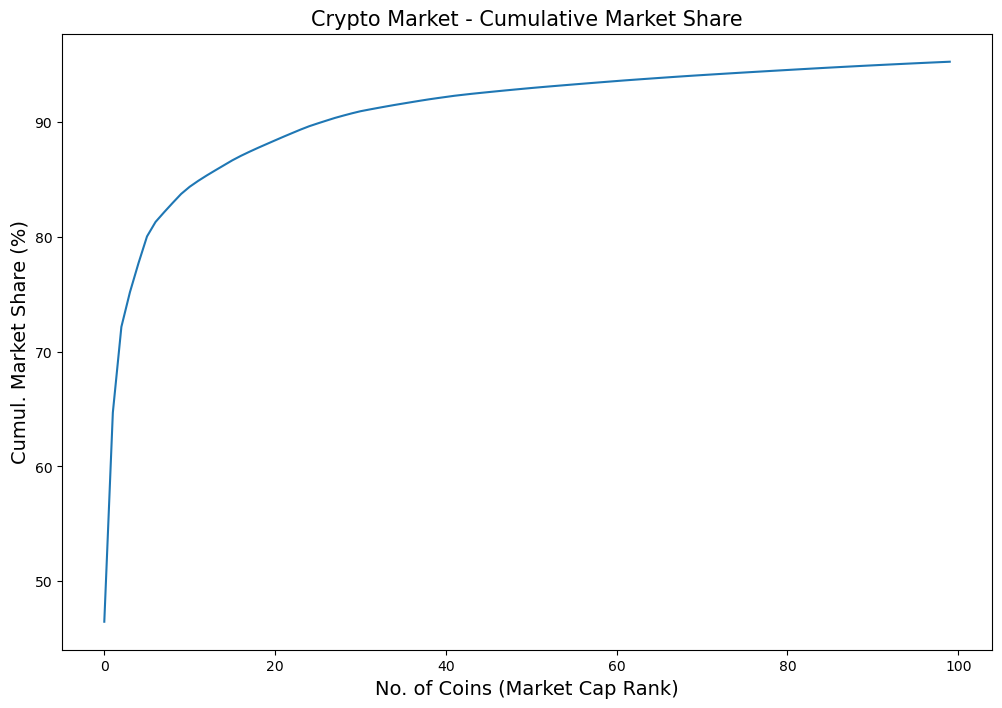

In [19]:
df.iloc[0:100].market_share.cumsum().plot(figsize = (12, 8))
plt.title("Crypto Market - Cumulative Market Share", fontsize = 15)
plt.xlabel("No. of Coins (Market Cap Rank)", fontsize = 14)
plt.ylabel("Cumul. Market Share (%)", fontsize = 14)
plt.show()